# 도전학기제 '도서관 데이터 활용 공모전'
부산광역시 지도를 행정구별로 나누어 시각화 함.

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
!pip install folium

In [75]:
# 지도 띄우기 테스트
import folium

myMap = folium.Map(location=[37.4729081, 127.039306], zoom_start=10)

myMap

In [77]:
!pip install pandas

In [78]:
import pandas as pd

lib_data = pd.read_csv('/content/library.csv')
lib_data

,Unnamed: 0,library_area,library_nm,library_addr,library_tel,library_hompage
0,0,강서구,강서기적의도서관,강서구 명지오션시티10로 80(명지동),051-970-2317,https://library.bsgangseo.go.kr/intro.php
1,1,강서구,강서도서관,강서구 공항로811번길 10,051-970-4068,https://library.bsgangseo.go.kr/intro.php
2,2,강서구,지사도서관,강서구 과학산단2로20번길 5(지사문화회관 3층),051-970-2777,https://library.bsgangseo.go.kr/jslib/
3,3,금정구,금정도서관,금정구 청룡동 금정도서관로 33,051-519-5601,https://library.geumjeong.go.kr/index.geumj
4,4,금정구,서동도서관,금정구 서부로76번길 5,051-522-0456,https://home.pen.go.kr/seodonglib/main.do
5,5,기장군,고촌어울림도서관,기장군 기장읍 차성서로 86(백두공원 내),051-709-5381~2,https://library.gijang.go.kr/gochon/main.do
6,6,기장군,기장도서관,기장군 기장읍 차성동로 126번길 13-5,051-709-5327,https://library.gijang.go.kr/main.do
7,7,기장군,기장디지털도서관,기장군 기장읍 기장대로 560 기장군청 7층,051-709-5071,http://dlib.gijang.go.kr/main.do
8,8,기장군,내리새라도서관,기장군 기장읍 기장대로 51,051-709-3967~3969,https://library.gijang.go.kr/naeri/main.do
9,9,기장군,대라다목적도서관,기장군 기장읍 차성서로 86,051-709-3961,https://library.gijang.go.kr/main.do


In [79]:
# 도서관 주소 데이터 전처리
addr = list(lib_data['library_addr'])

lib_addr = []
for i in addr:
    result = i.split('(')
    result = result[0]
    lib_addr.append(result)

lib_addr

['강서구 명지오션시티10로 80',
 '강서구 공항로811번길 10',
 '강서구 과학산단2로20번길 5',
 '금정구 청룡동 금정도서관로 33',
 '금정구 서부로76번길 5',
 '기장군 기장읍 차성서로 86',
 '기장군 기장읍 차성동로 126번길 13-5',
 '기장군 기장읍 기장대로 560 기장군청 7층',
 '기장군 기장읍 기장대로 51',
 '기장군 기장읍 차성서로 86',
 '기장군 정관읍 정관중앙로 100',
 '기장군 정관읍 정관8로 11',
 '남구 수영로267번길 61',
 '남구 분포로 97, 분포도서관 ',
 '동구 성북로36번길 54',
 '동구 수성로21',
 '동구 홍곡로 53번지',
 '동래구 칠산동 21-1',
 '동래구 명안로46번길 35',
 '동래구 명안로10번길 64',
 '부산진구 백양순환로110번길 25',
 '부산진구 동천로 79',
 '부산진구 월드컵대로 462',
 '부산진구 가야대로 734',
 '북구 백양대로1016번다길 43',
 '북구 금곡동 92-2',
 '북구 은행나무로 26',
 '북구 화명대로12번길 59',
 '사상구 사상로310번길 33',
 '사상구 덕상로72번길 9',
 '사하구 다대낙조2길 9',
 '사하구 승학로 247',
 '서구 대신공원로 41',
 '수영구 망미1동 640-15번지',
 '수영구 남천서로 33',
 '수영구 장대골로 75-6',
 '연제구 고분로191번길 16',
 '연제구 황령산로 612',
 '영도구 함지로79번길 6',
 '영도구 절영로 71',
 '중구 망양로193번길 146',
 '해운대구 아랫반송로 22',
 '해운대구 반여3동 1575-78',
 '해운대구 재송동 해운대로76번길 35-1',
 '해운대구 양운로 183',
 '해운대구 우동1로 89',
 '해운대구 반여로 132']

In [80]:
!pip install requests

In [81]:
import requests

KAKAO_REST_API_KEY = '' # kakao developers REST API key

def convert_to_coordinates(input):

    ####################################################################################
    # 주소 검색 API
    url = 'https://dapi.kakao.com/v2/local/search/address.json?query=' + input
    header = {'Authorization': 'KakaoAK ' + KAKAO_REST_API_KEY}

    r = requests.get(url, headers=header)

    if r.status_code == 200:
        response_data = r.json()
        if response_data["documents"]:
            first_result = response_data["documents"][0]
            lng = float(first_result['x'])
            lat = float(first_result['y'])
            return lat, lng
    ####################################################################################
    return "검색 결과가 없습니다."

latitude = [] # 위도
longitude =[] # 경도

for i in lib_addr:
    latitude.append(convert_to_coordinates(i)[0])
    longitude.append(convert_to_coordinates(i)[1])

In [176]:
df_lat = pd.DataFrame({'위도':latitude})
df_lon = pd.DataFrame({'경도':longitude})

lib_data['latitude'] = df_lat
lib_data['longitude'] = df_lon

lib_data.to_csv('lib_data_latlng.csv', index=False, encoding='utf-8-sig') # 위경도 표시된 도서관 정보 파일로 저장
lib_data

,Unnamed: 0,library_area,library_nm,library_addr,library_tel,library_hompage,latitude,longitude
0,0,강서구,강서기적의도서관,강서구 명지오션시티10로 80(명지동),051-970-2317,https://library.bsgangseo.go.kr/intro.php,35.086163,128.904741
1,1,강서구,강서도서관,강서구 공항로811번길 10,051-970-4068,https://library.bsgangseo.go.kr/intro.php,35.180191,128.957408
2,2,강서구,지사도서관,강서구 과학산단2로20번길 5(지사문화회관 3층),051-970-2777,https://library.bsgangseo.go.kr/jslib/,35.150931,128.831289
3,3,금정구,금정도서관,금정구 청룡동 금정도서관로 33,051-519-5601,https://library.geumjeong.go.kr/index.geumj,35.272613,129.096182
4,4,금정구,서동도서관,금정구 서부로76번길 5,051-522-0456,https://home.pen.go.kr/seodonglib/main.do,35.219876,129.099418
5,5,기장군,고촌어울림도서관,기장군 기장읍 차성서로 86(백두공원 내),051-709-5381~2,https://library.gijang.go.kr/gochon/main.do,35.240799,129.210592
6,6,기장군,기장도서관,기장군 기장읍 차성동로 126번길 13-5,051-709-5327,https://library.gijang.go.kr/main.do,35.249683,129.217305
7,7,기장군,기장디지털도서관,기장군 기장읍 기장대로 560 기장군청 7층,051-709-5071,http://dlib.gijang.go.kr/main.do,35.243482,129.222956
8,8,기장군,내리새라도서관,기장군 기장읍 기장대로 51,051-709-3967~3969,https://library.gijang.go.kr/naeri/main.do,35.201822,129.206185
9,9,기장군,대라다목적도서관,기장군 기장읍 차성서로 86,051-709-3961,https://library.gijang.go.kr/main.do,35.240799,129.210592


In [174]:
area_count = pd.DataFrame(lib_data['library_area'].value_counts())
area_count = area_count.reset_index()
area_count

,library_area,count
0,기장군,7
1,해운대구,6
2,부산진구,4
3,북구,4
4,강서구,3
5,동구,3
6,동래구,3
7,수영구,3
8,금정구,2
9,남구,2


In [162]:
# test map
geo_json = 'busan_gu.json'
busan_map = folium.Map(location=[35.137922, 129.055628], tiles='CartoDB positron', zoom_start = 10)
folium.Choropleth(
    geo_data=geo_json,
    data = area_count,
    columns = ('library_area', 'count'),
    key_on='feature.properties.name',
    highlight=True,
    fill_opacity=0.5,
    line_opacity=1,
    line_color = 'hotpink',
    fill_color='PuRd').add_to(busan_map)

busan_map


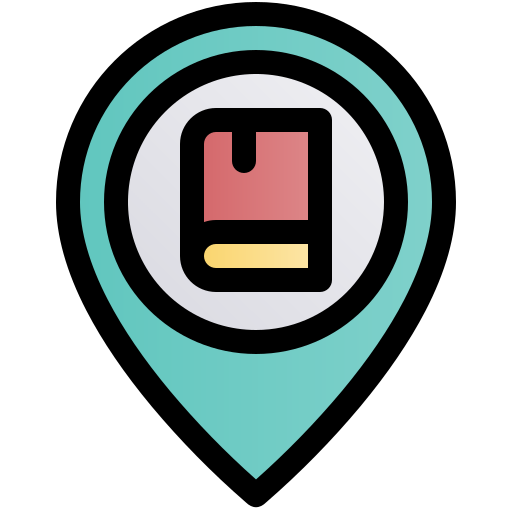
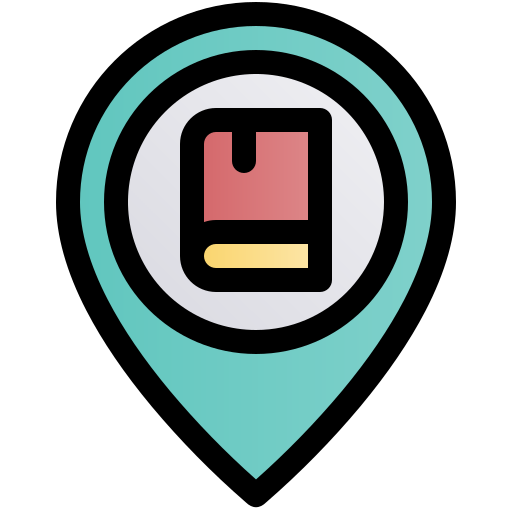
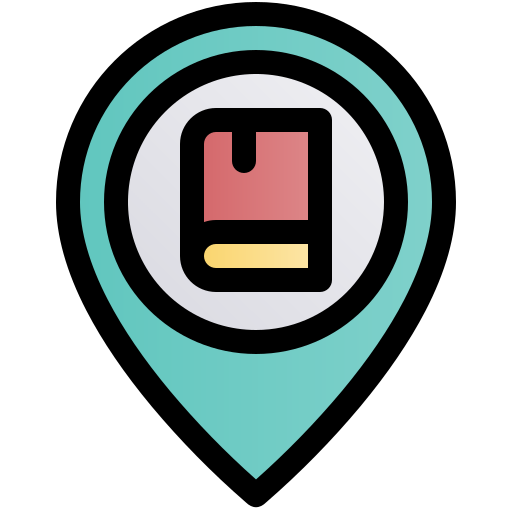
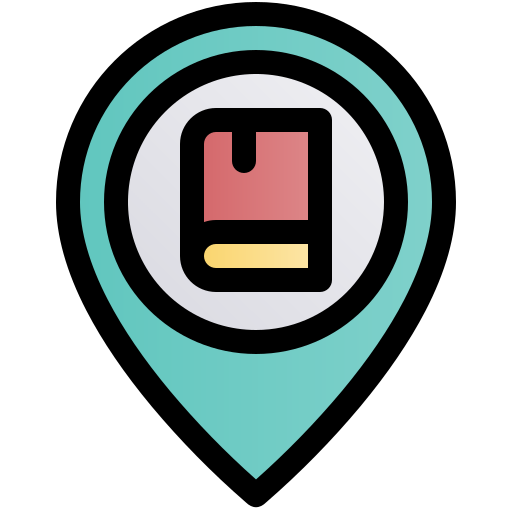
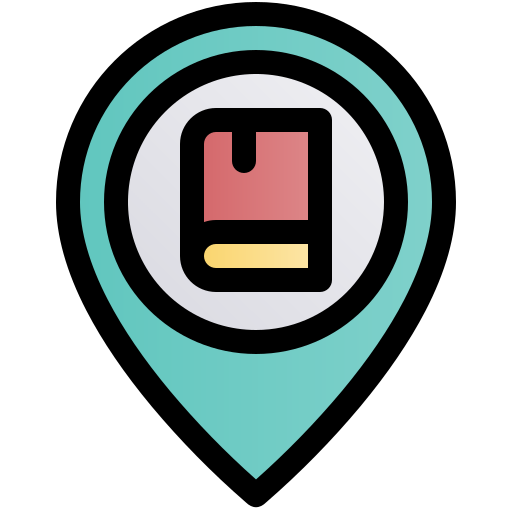
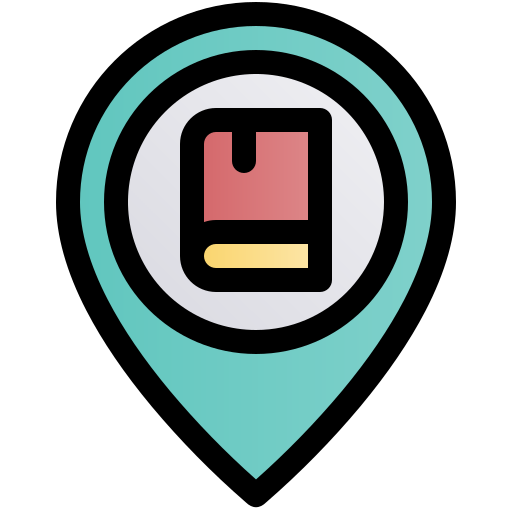
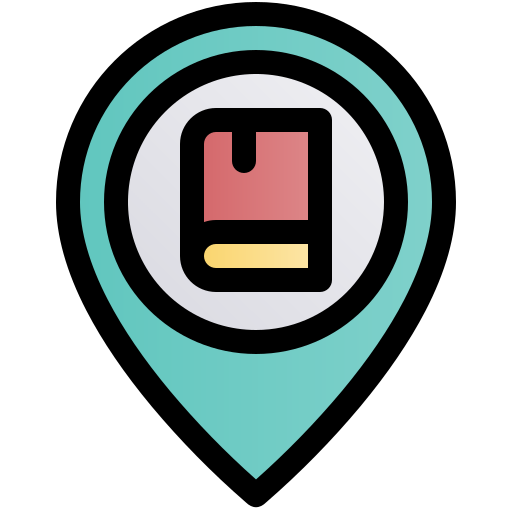
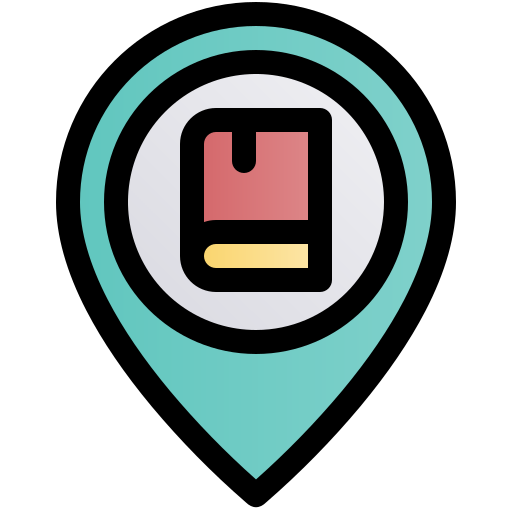
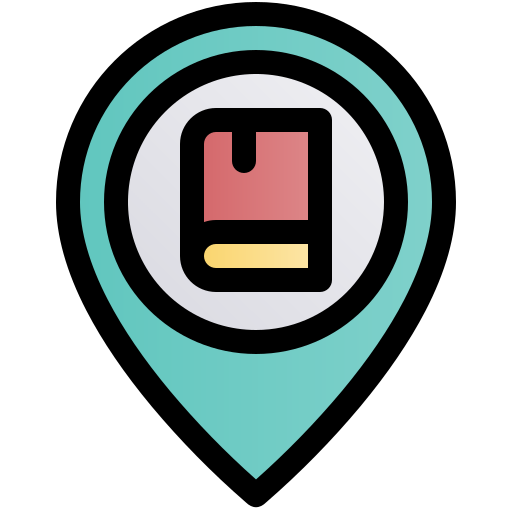
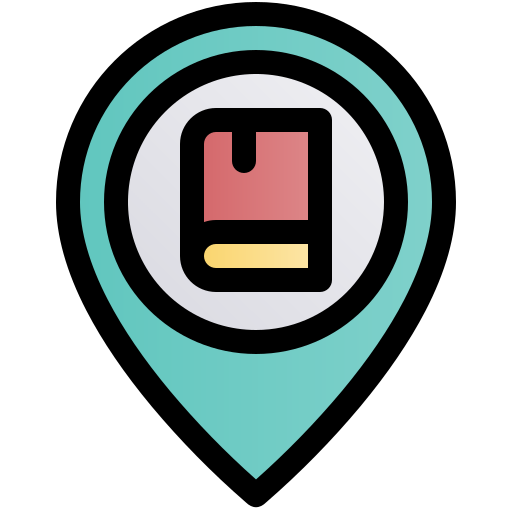
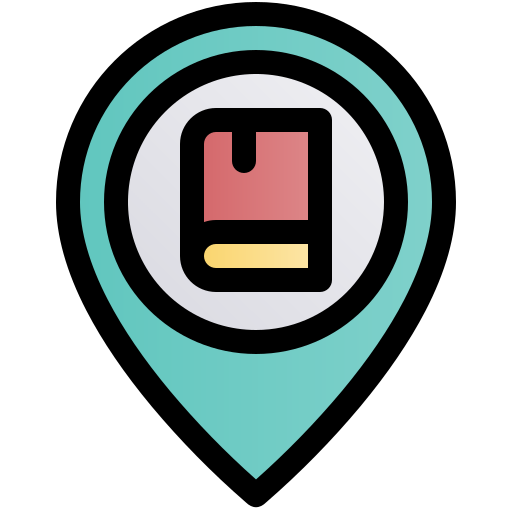
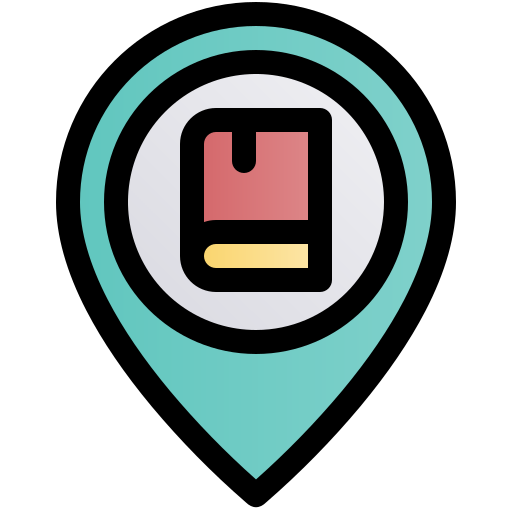
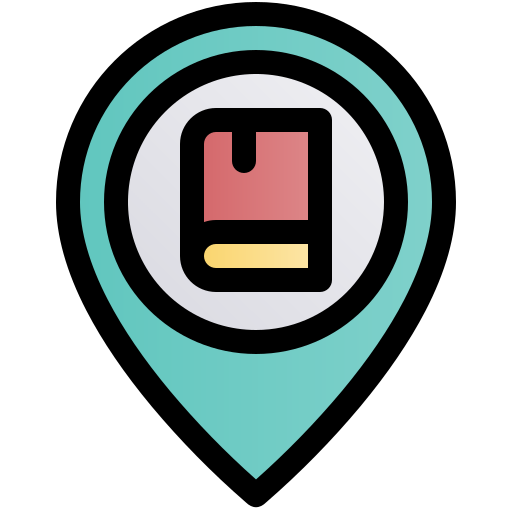
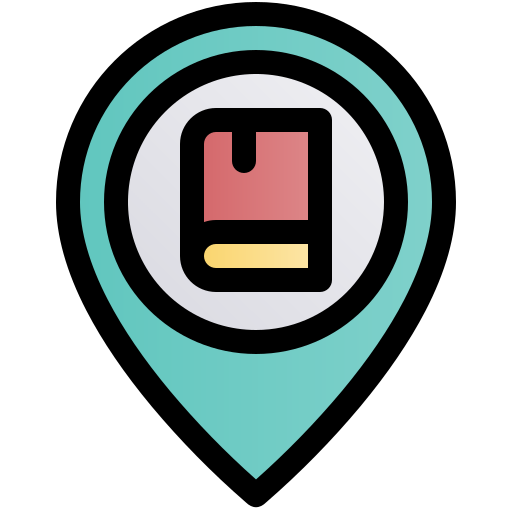
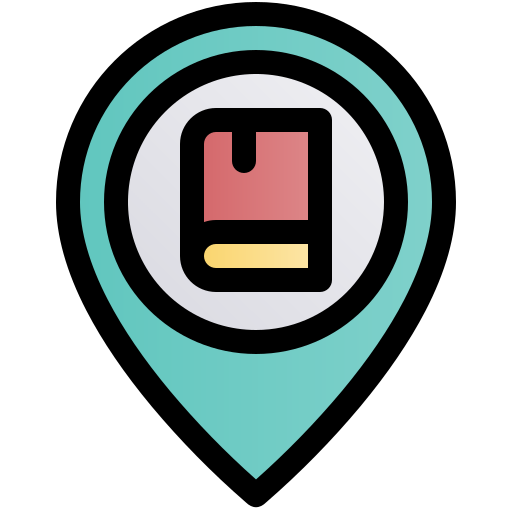
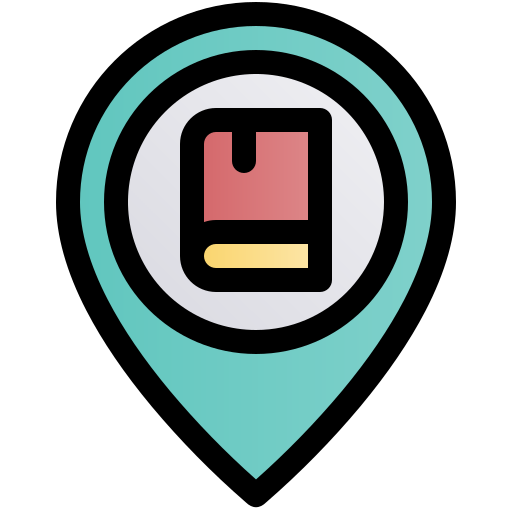
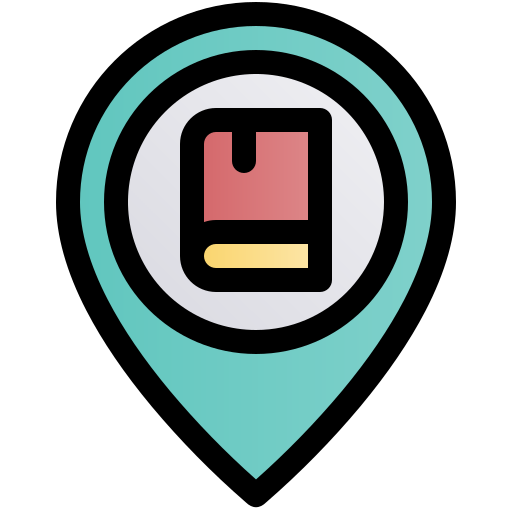
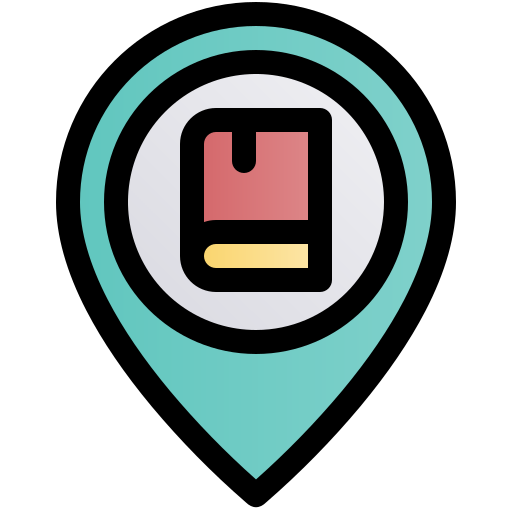
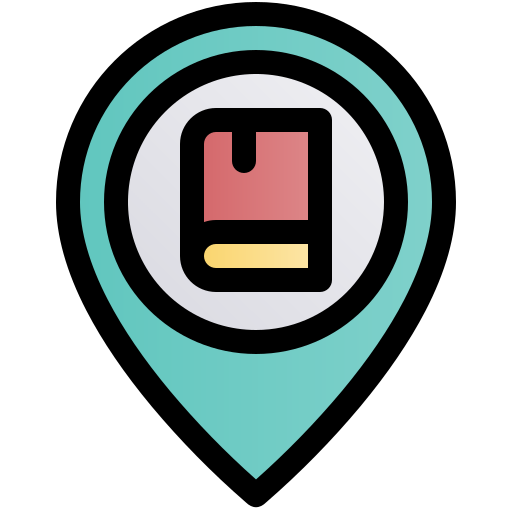
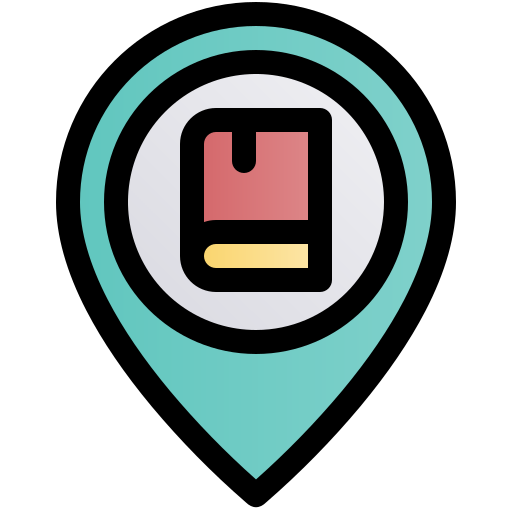
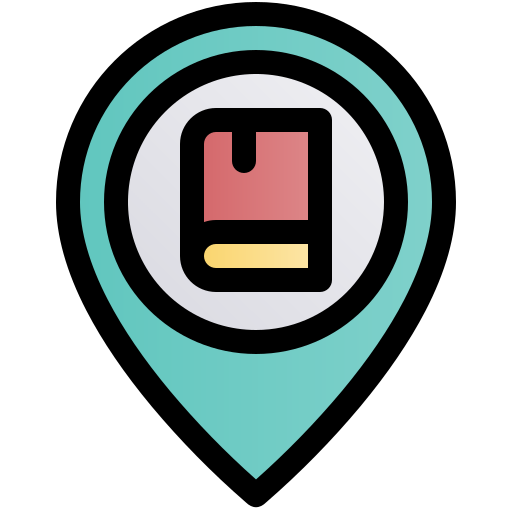
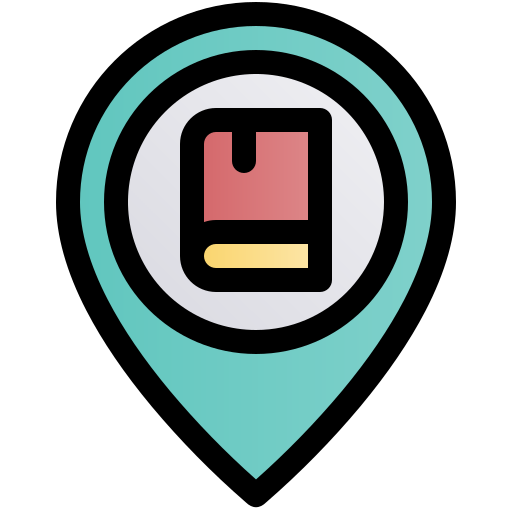
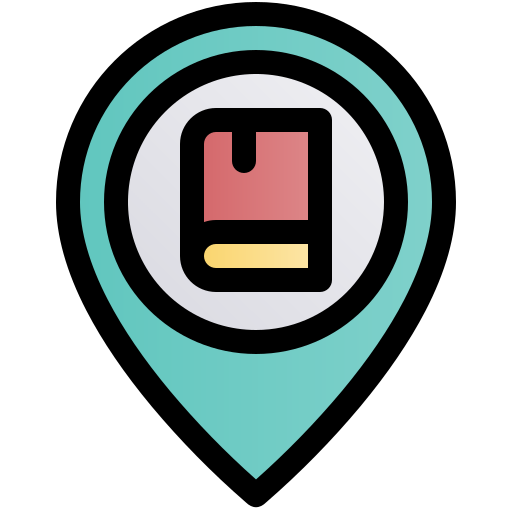
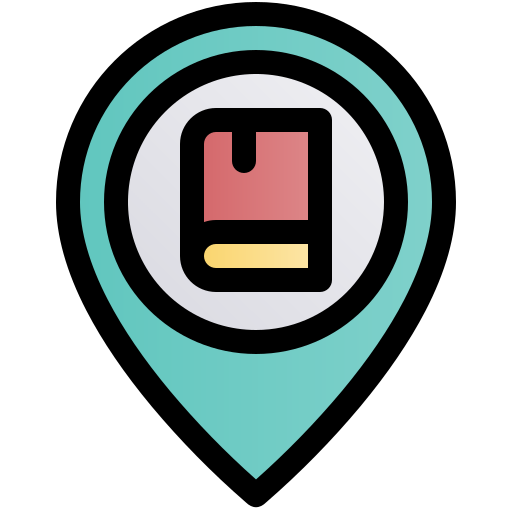
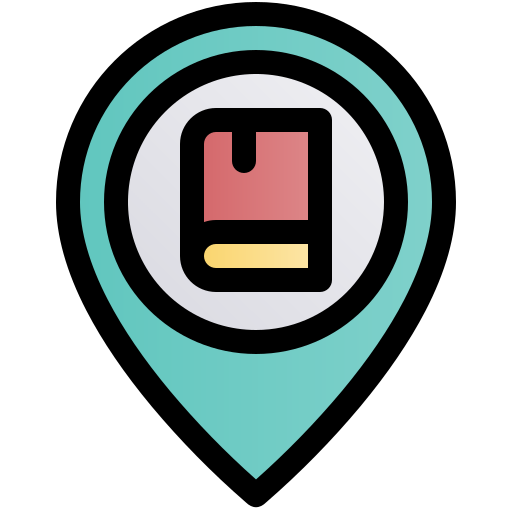
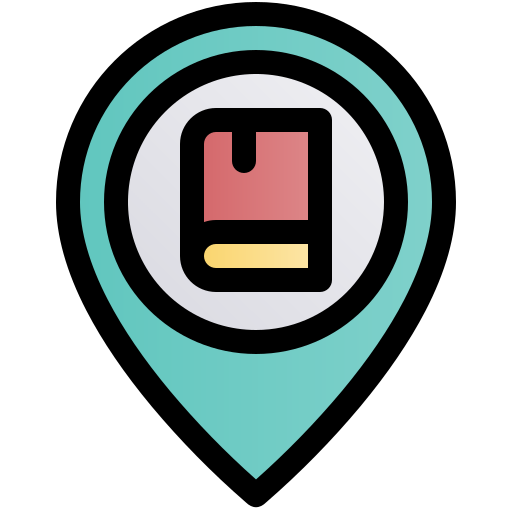
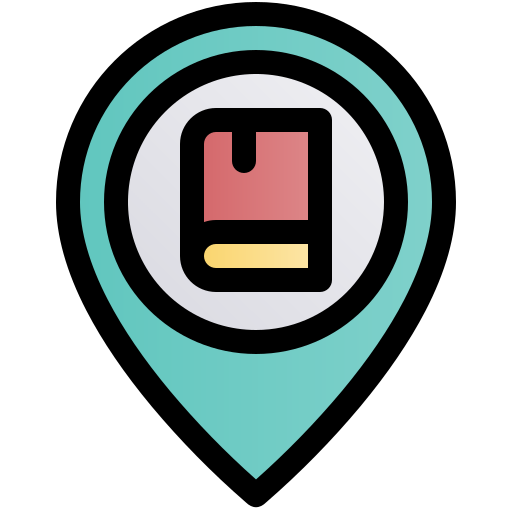
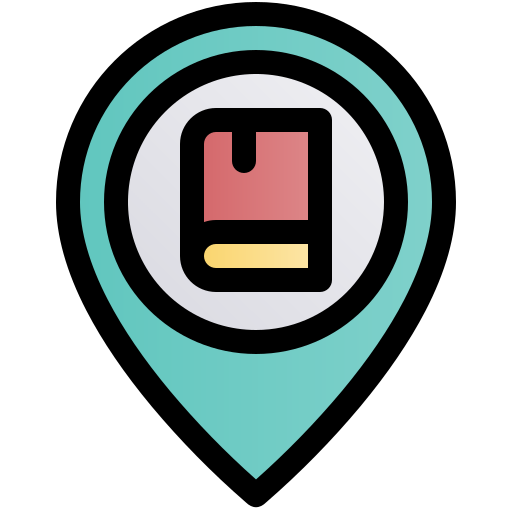
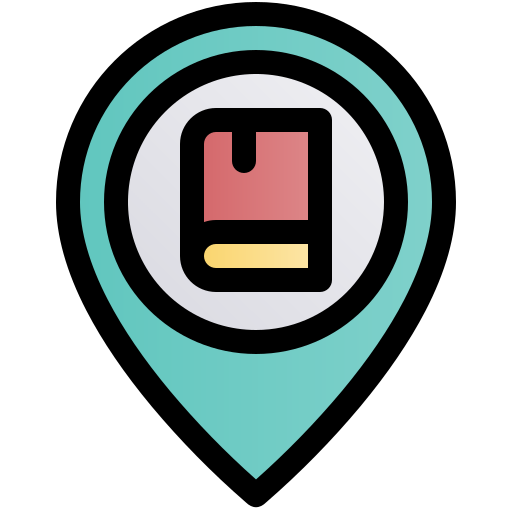
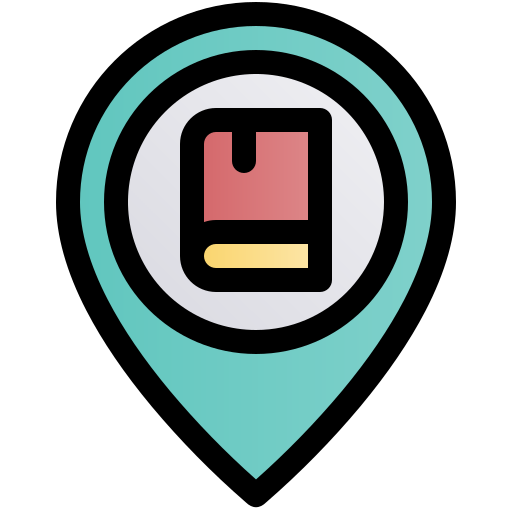
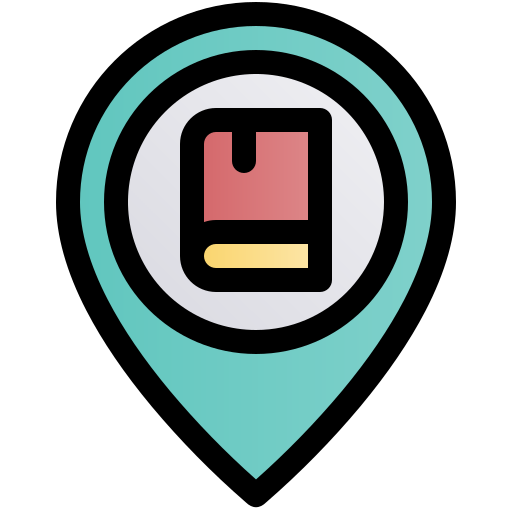
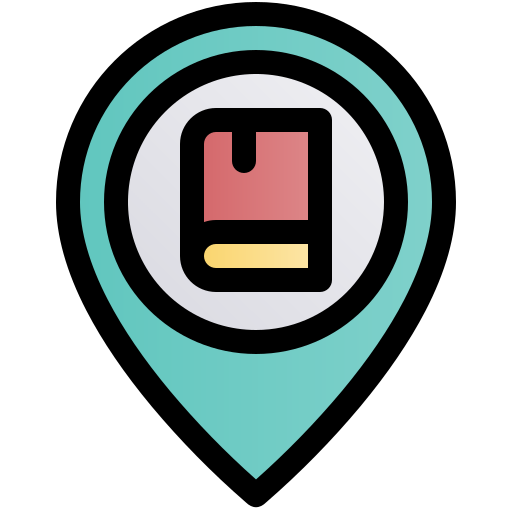
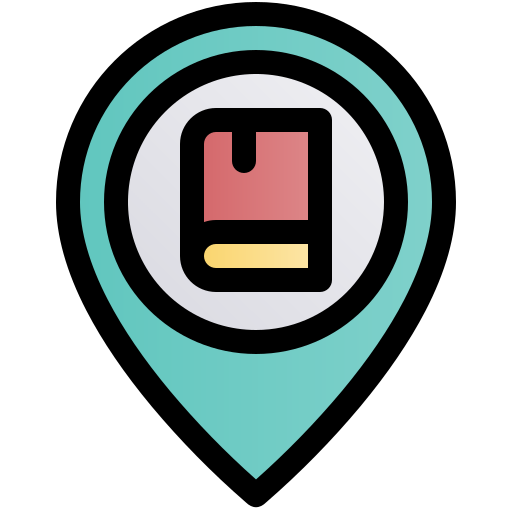
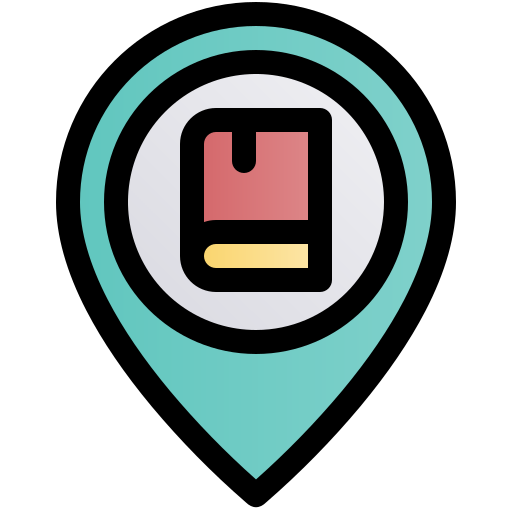
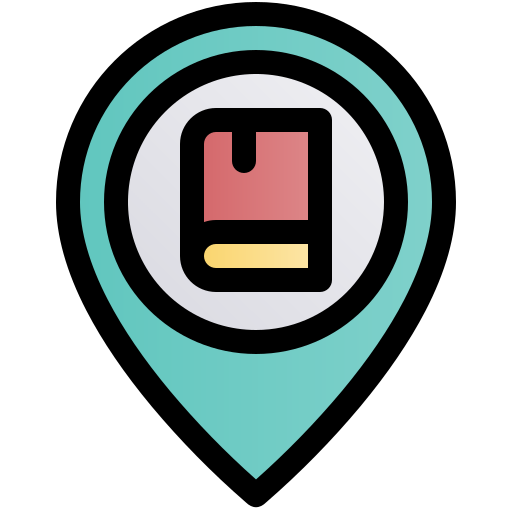
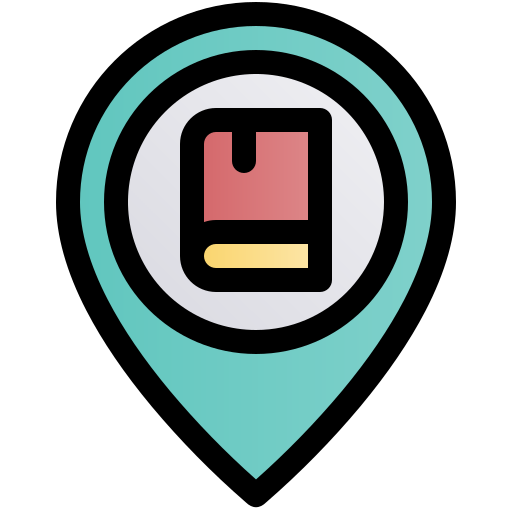
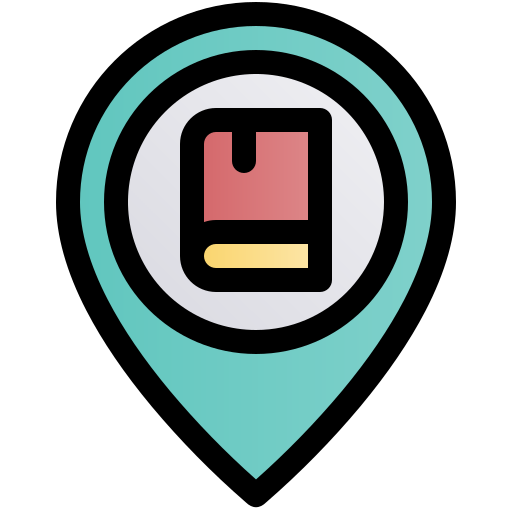
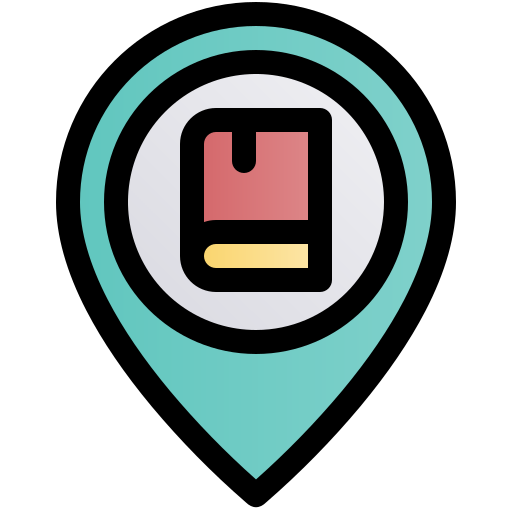
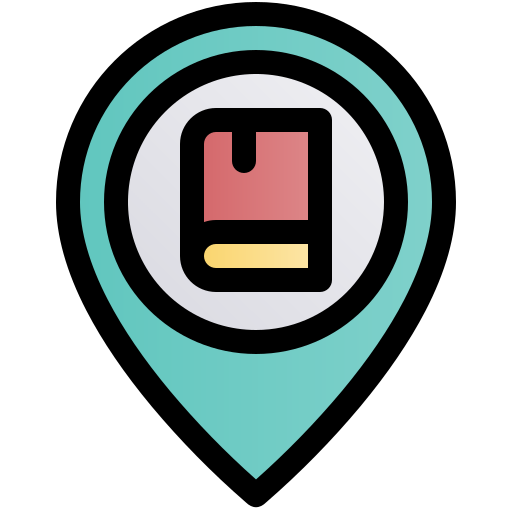
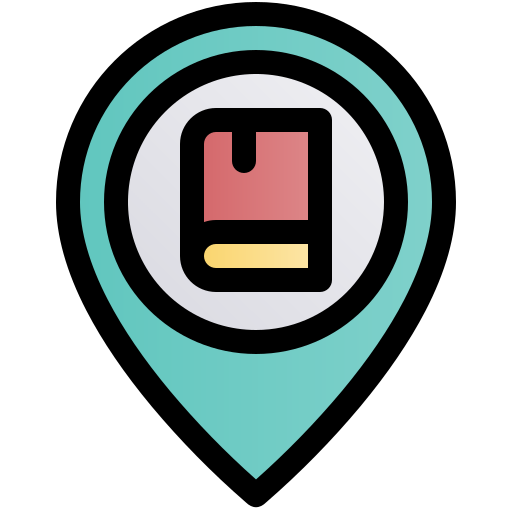
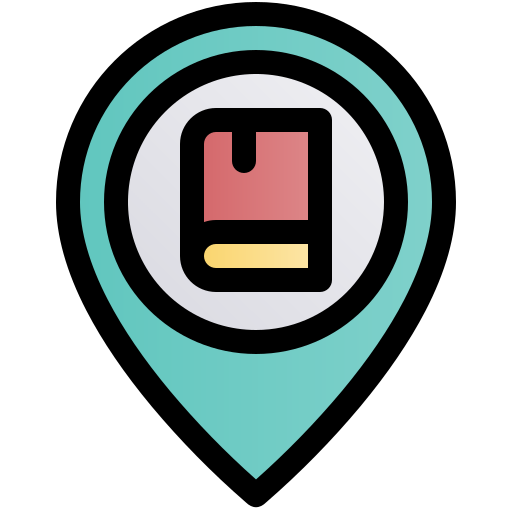
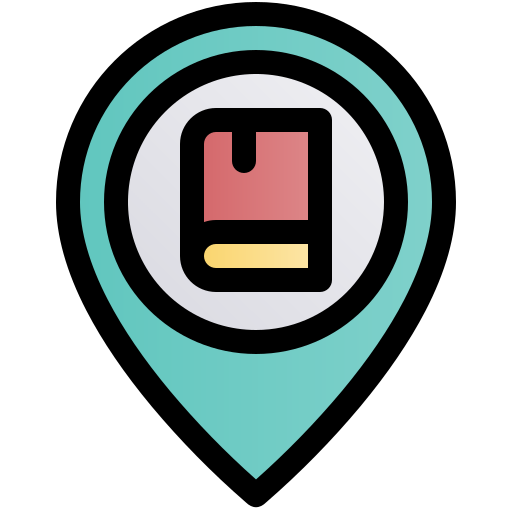
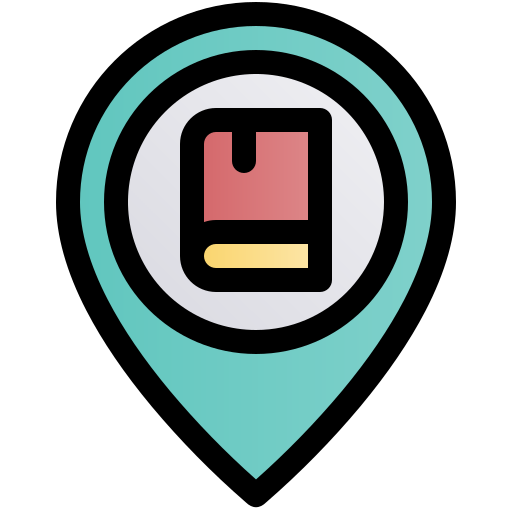
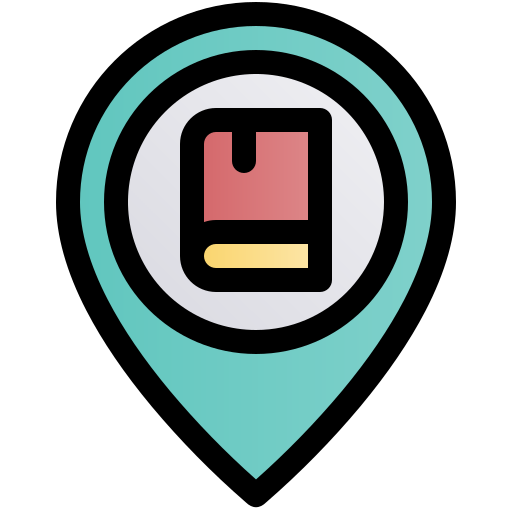
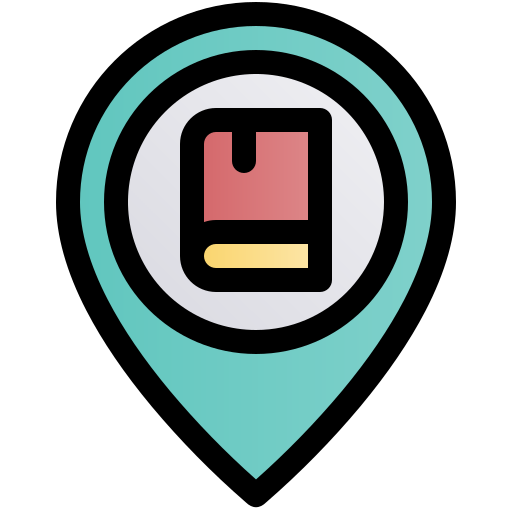
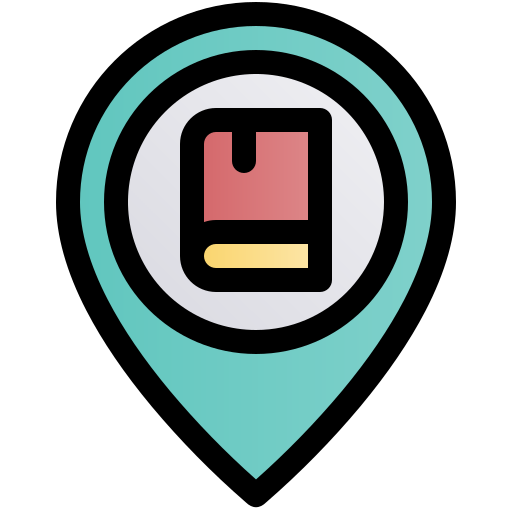
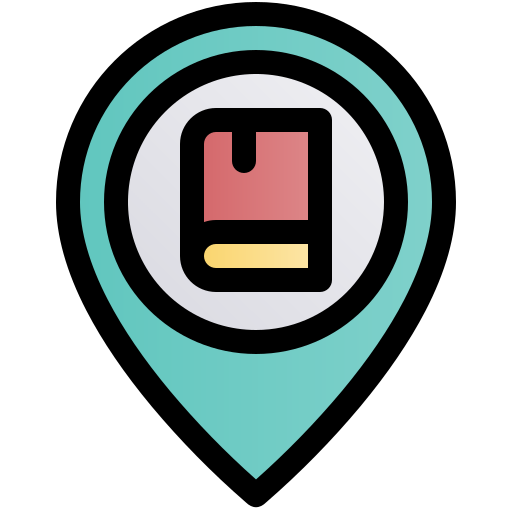

In [172]:
from folium.plugins import MarkerCluster
from folium.features import CustomIcon

geo_json = 'busan_gu.json'
busan_map = folium.Map(location=[35.137922, 129.055628], tiles='CartoDB positron', zoom_start = 10)
folium.Choropleth(
    geo_data=geo_json,
    data = area_count,
    columns = ('library_area', 'count'),
    key_on='feature.properties.name',
    highlight=True,
    fill_opacity=0.5,
    line_opacity=1,
    line_color = 'hotpink',
    fill_color='PuRd').add_to(busan_map)

for _, row in lib_data.iterrows():
    popup = folium.Popup("<pre>" + "도서관 이름: " + str(row['library_nm']) + "<br>" + "전화번호: " + str(row['library_tel']) + "<br>" + "홈페이지: " + "<a href= " + "'" + str(row['library_hompage']) + "'" + "target='_blank'>" + str(row['library_nm']) + "</a>" + "</pre>", min_width=300, max_width=300)
    icon = CustomIcon("/content/location_marker2.png", icon_size=(40, 40))
    tooltip = row['library_nm']
    folium.Marker(location=[row['latitude'], row['longitude']], popup=popup, icon=icon, tooltip=tooltip).add_to(busan_map)

busan_map